In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 100
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_train.csv', index_col ='match_id_hash')
target = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\train_targets.csv', index_col = 'match_id_hash')
y = target['radiant_win']
y = y.apply(lambda x: int(x))
# data = data.drop(columns = ['positions'])
data.head()


,r_hero_id,r_kills,r_deaths,r_assists,r_denies,r_gold,r_lh,r_xp,r_max_mana,r_stuns,...,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,-355,0,1,0,4,2037,25,1991,1490.68891,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,0.000000,0.000000,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,341,16,4,14,28,18172,127,17566,2414.68981,42.060296,...,1.098612,1.386294,0.693147,1.098612,2.639057,2.708050,1.386294,1.098612,2.397895,6.490724
6db558535151ea18ca70a6892197db41,3,0,0,0,0,880,0,0,1670.68912,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,559,6,2,8,43,13348,131,14663,2474.68982,11.397237,...,0.000000,1.945910,0.000000,1.098612,2.639057,2.484907,0.000000,0.000000,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,735,2,4,3,0,8079,62,9762,2364.68977,15.262940,...,0.000000,1.098612,0.000000,0.693147,2.484907,2.197225,0.000000,0.000000,1.386294,6.118097


# Smaller Dataset, Feature Selector, Logistic Regression

In [163]:
# smaller dataset

col_to_drop = ['r_deaths', 'd_deaths'] 
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base','r_firstblood_claimed','d_firstblood_claimed', 'r_in_r_base', 'd_in_d_base']
num_feats = [col for col in data.columns if col not in cat_feats]

In [157]:
# # determine the columns of the numerical data for further normalization
# first_blood_claimed = ['r{}_firstblood_claimed'.format(x) for x in range(1,6)]+['d{}_firstblood_claimed'.format(x) for x in range(1,6)]+['r_firstblood_claimed','d_firstblood_claimed']
# cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base', 'r_in_r_base', 'd_in_d_base']+first_blood_claimed
# num_feats = [col for col in data.columns if col not in cat_feats]
# # numerical

In [164]:
numerical_columns =[]
for j in range(len(data.columns)):
    if data.columns[j] in num_feats:
        numerical_columns.append(j)

In [165]:
from sklearn.model_selection import train_test_split

X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [166]:
X_train.shape

(27772, 103)

In [167]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))




In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 1,penalty = 'l2',random_state = 50 )




In [196]:
from sklearn.feature_selection import RFECV

X_trans = preprocess.fit_transform(X_train)
feat_selector = RFECV(logreg, step = 3, cv = 5, min_features_to_select = 20)
feat_selector = feat_selector.fit(X_trans, y_train)

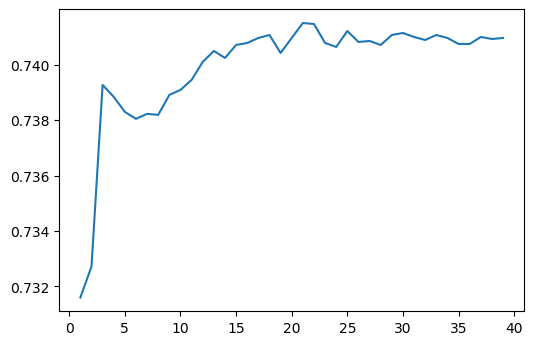

In [197]:
plt.plot(range(1, len(feat_selector.grid_scores_) + 1), feat_selector.grid_scores_)

In [172]:
# select only the matrix of meaningfull features
X_train_new = feat_selector.transform(X_trans)
X_test_new = feat_selector.transform(preprocess.transform(X_test))


0.7419978156767202
0.7402446134795683


Text(0.5, 0, 'coefficients of regression')

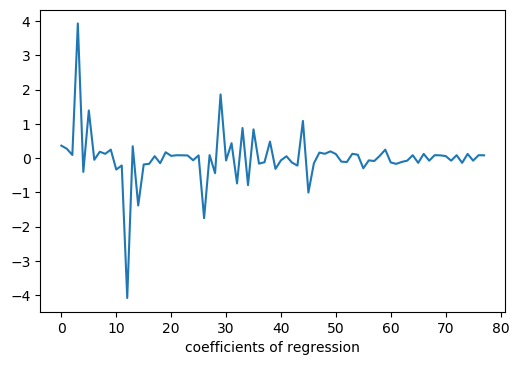

In [195]:
logreg.fit(X_train_new,y_train)
predicted = logreg.predict(X_test_new)
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test,predicted))
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [174]:
# fit this model on only selected fetures:

X_trans = preprocess.fit_transform(X)
logreg.fit(X_trans,y)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [175]:
test_data = data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')
test_data.shape

(10000, 103)

In [176]:
X_sub = test_data
X_sub_trans = preprocess.transform(X_sub)
y_test_pred = logreg.predict_proba(X_sub_trans)[:, 1]

In [177]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)

print('Submission saved to {}'.format(submission_filename))
df_submission.head(10)

Submission saved to submission_2019-11-13_21-20-04.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.335618
70e5ba30f367cea48793b9003fab9d38,0.977452
4d9ef74d3a2025d79e9423105fd73d41,0.964819
2bb79e0c1eaac1608e5a09c8e0c6a555,0.714195
bec17f099b01d67edc82dfb5ce735a43,0.342366
038acbb47d9eb54c11962d07cce8d829,0.043991
b891f03bb2a86d78b84043437fc95e04,0.923429
ff898afdb5bb5c7163bde45a009503f7,0.048268
72e6b1c31c718c0806f9aaeb8b7290a9,0.600724


# Smaller Dataset, Logistic Regression, no Feature Selector

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 1,penalty = 'l2',random_state = 50 )

pipe = make_pipeline(preprocess, logreg)

In [202]:

cv_pred = cross_val_predict(pipe, 
                             X_train, 
                             y_train, 
                             cv=5,
                             method="predict_proba")
print("Cross validation AUC {:.4f}".format(roc_auc_score(y_train, cv_pred[:,1])))

Cross validation AUC 0.8189


In [203]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_gold', 'r_lh'..., penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [204]:
predicted = pipe.predict(X_test)
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test,predicted))

0.7311602117113333
0.7289107801167521


In [160]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_gold', 'r_lh'..., penalty='l2', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Text(0.5, 0, 'coefficients of regression')

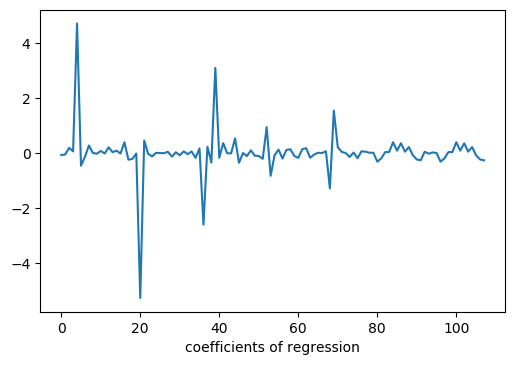

In [161]:
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [162]:
test_data = data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')
test_data.shape

In [132]:
X_sub = test_data
y_test_pred = pipe.predict_proba(X_sub)[:, 1]
y_test_pred

In [135]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

In [111]:
df_submission.shape

(10000, 1)

# Full dats set

In [116]:
# determine the columns of the numerical data for further normalization
data = data.drop(columns = 'positions')
first_blood_claimed = ['r{}_firstblood_claimed'.format(x) for x in range(1,6)]+['d{}_firstblood_claimed'.format(x) for x in range(1,6)]+['r_firstblood_claimed','d_firstblood_claimed']
cat_feats = ['game_mode','lobby_type', 'r_in_d_base', 'd_in_r_base', 'r_in_r_base', 'd_in_d_base']+first_blood_claimed
num_feats = [col for col in data.columns if col not in cat_feats]
# numerical

In [117]:
numerical_columns =[]
for j in range(len(data.columns)):
    if data.columns[j] in num_feats:
        numerical_columns.append(j)

In [118]:
X.head()

,positions,r_hero_id,r_kills,r_deaths,r_assists,r_denies,r_gold,r_lh,r_xp,r_max_mana,...,log_r_creeps_stacked,log_d_creeps_stacked,log_r_camps_stacked,log_d_camps_stacked,log_r_rune_pickups,log_d_rune_pickups,log_r_sen_placed,log_d_sen_placed,log_chat_len,log_game_time
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,0,-355,0,1,0,4,2037,25,1991,1490.68891,...,0.000000,0.000000,0.000000,0.000000,1.098612,2.079442,0.000000,0.000000,2.484907,5.049856
b9c57c450ce74a2af79c9ce96fac144d,1,341,16,4,14,28,18172,127,17566,2414.68981,...,1.098612,1.386294,0.693147,1.098612,2.639057,2.708050,1.386294,1.098612,2.397895,6.490724
6db558535151ea18ca70a6892197db41,1,3,0,0,0,0,880,0,0,1670.68912,...,0.000000,0.000000,0.000000,0.000000,1.386294,0.693147,0.000000,0.000000,0.000000,3.091042
46a0ddce8f7ed2a8d9bd5edcbb925682,1,559,6,2,8,43,13348,131,14663,2474.68982,...,0.000000,1.945910,0.000000,1.098612,2.639057,2.484907,0.000000,0.000000,1.609438,6.357842
b1b35ff97723d9b7ade1c9c3cf48f770,0,735,2,4,3,0,8079,62,9762,2364.68977,...,0.000000,1.098612,0.000000,0.693147,2.484907,2.197225,0.000000,0.000000,1.386294,6.118097


In [119]:
from sklearn.model_selection import train_test_split
X = data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.compose import ColumnTransformer, make_column_transformer

preprocess = make_column_transformer(
    (StandardScaler(), num_feats),
    (OneHotEncoder(),cat_feats))

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, roc_auc_score


logreg = LogisticRegression(C = 10,penalty = 'l1',random_state = 50 )

pipe = make_pipeline(preprocess, logreg)

In [143]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['r_hero_id', 'r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_..., penalty='l1', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [144]:
predicted = pipe.predict(X_test)
print(accuracy_score(y_test, predicted))
print(roc_auc_score(y_test,predicted))

0.7393094177938335
0.7375240898637891


In [145]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True), ['r_hero_id', 'r_kills', 'r_deaths', 'r_assists', 'r_denies', 'r_..., penalty='l1', random_state=50, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Text(0.5, 0, 'coefficients of regression')

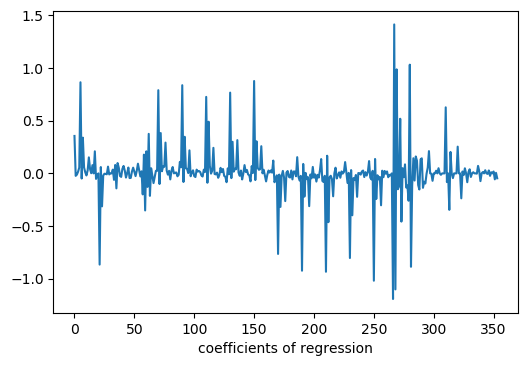

In [146]:
c = logreg.coef_
plt.plot(c[0])
plt.xlabel('coefficients of regression')

In [147]:
test_data = data = pd.read_csv(r'C:\Users\Tatiana\Documents\Programming\MLcourse competition\new_feat_test.csv', index_col ='match_id_hash')
test_data.shape

(10000, 315)

In [148]:
X_sub = test_data
y_test_pred = pipe.predict_proba(X_sub)[:, 1]
y_test_pred

array([0.34202548, 0.97225934, 0.96722677, ..., 0.34132535, 0.87918068,
       0.10081824])

In [149]:
df_submission = pd.DataFrame({'radiant_win_prob': y_test_pred},index=test_data.index)

import datetime
submission_filename = 'submission_{}.csv'.format(
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))
df_submission.to_csv(submission_filename)
print('Submission saved to {}'.format(submission_filename))

df_submission.head(10)

Submission saved to submission_2019-11-13_20-55-34.csv


,radiant_win_prob
match_id_hash,
30cc2d778dca82f2edb568ce9b585caa,0.342025
70e5ba30f367cea48793b9003fab9d38,0.972259
4d9ef74d3a2025d79e9423105fd73d41,0.967227
2bb79e0c1eaac1608e5a09c8e0c6a555,0.751472
bec17f099b01d67edc82dfb5ce735a43,0.298402
038acbb47d9eb54c11962d07cce8d829,0.064332
b891f03bb2a86d78b84043437fc95e04,0.913580
ff898afdb5bb5c7163bde45a009503f7,0.033387
72e6b1c31c718c0806f9aaeb8b7290a9,0.642313
